# **Reading the image dataset**



In [15]:
# Loading the Keras dataset module for MNIST:
from tensorflow.keras.datasets import mnist


import matplotlib.pyplot as plt

# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

The pixel values which are ranging from 0 to 255 are stored with respect to different 785-pixel positions.

In [16]:
X_train.shape

(60000, 28, 28)

In [17]:
X_test.shape

(10000, 28, 28)

we can see that these 28x28 images are represented as a collection of unsigned 8-bit integer values between 0 and 255, the values corresponding with a pixel's grayscale value where 0 is black, 255 is white, and all other values are in between:

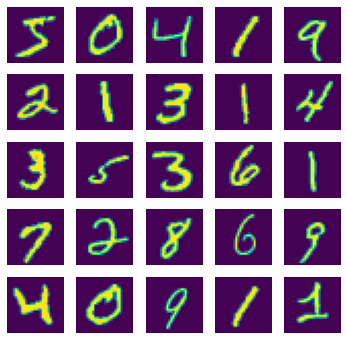

In [18]:
# Visualizing some images
import matplotlib.pyplot as plt
import numpy as np
fig,axes = plt.subplots(5, 5, figsize = (6,6))
axes = axes.ravel()
for i in np.arange(0,25):
    axes[i].imshow(X_train[i])
    axes[i].axis("off")

# **Data Preprocessing**

The pixel values are ranging from 0 to 255 but these pixel values will lead the neural network to give higher weights to the large values. So to avoid this we need to scale down all pixel values between the range 0 to 1. Before scaling down we will make sure the data is represented in 32 bits. 

In [19]:
# Scaling the pixel values to be between 0 and 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255

While building the CNN model we need to specify the colour channel of the image which is grey, so below we will add the color channel to all samples.

In [20]:
# Reshaping the training and test features
import tensorflow as tf
X_train = tf.reshape(X_train, (-1, 28, 28, 1))
X_test = tf.reshape(X_test, (-1, 28, 28, 1))
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


# **Defining the CNN model**

In [21]:
# Library for CNN Model
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import TensorBoard

Now below we will define the sequential CNN model. The network will consist of 4 layers, one input and output layer each and two hidden layers. Neurons of the layers are activated according to the Relu activation function except for the last classifier layers whose neurons are activated according to the softmax function. 

In [22]:
#Defining the Convolutional Neural Network
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28, 1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [23]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 5, 5, 64)         

# **Training the CNN model**

Before training the network we have to compile the model with the appropriate loss function and optimizer. For this task, we are using sparse_categorical_crossentropy as the loss function and adam as the optimizer function. 

In [24]:
# Compiling
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

In [28]:
# Training the CNN model
history = cnn_model.fit(X_train, y_train, batch_size = 512, epochs = 10, verbose = 1)

Epoch 1/10
118/118 [==============================] - 55s 462ms/step - loss: 0.0816 - accuracy: 0.9752
Epoch 2/10
118/118 [==============================] - 60s 507ms/step - loss: 0.0740 - accuracy: 0.9772
Epoch 3/10
118/118 [==============================] - 46s 392ms/step - loss: 0.0680 - accuracy: 0.9791
Epoch 4/10
118/118 [==============================] - 62s 524ms/step - loss: 0.0631 - accuracy: 0.9801
Epoch 5/10
118/118 [==============================] - 51s 424ms/step - loss: 0.0624 - accuracy: 0.9809
Epoch 6/10
118/118 [==============================] - 56s 473ms/step - loss: 0.0575 - accuracy: 0.9822
Epoch 7/10
118/118 [==============================] - 53s 452ms/step - loss: 0.0550 - accuracy: 0.9829
Epoch 8/10
118/118 [==============================] - 55s 463ms/step - loss: 0.0538 - accuracy: 0.9832
Epoch 9/10
118/118 [==============================] - 52s 437ms/step - loss: 0.0501 - accuracy: 0.9845
Epoch 10/10
118/118 [==============================] - 50s 422ms/step - l

Text(0.5, 1.0, 'Accuracy evolution')

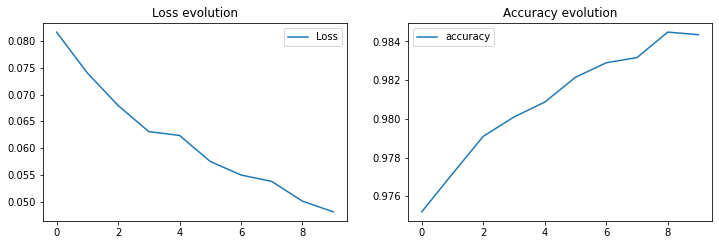

In [32]:
#VIsualizing the training performance
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.legend()
plt.title('Loss evolution')
plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.title('Accuracy evolution')

# **Making Predictions**

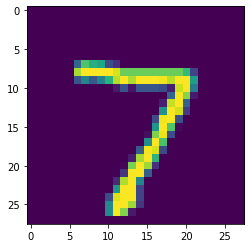

In [29]:
actual = tf.reshape(X_test[0], (28, 28))
plt.imshow(actual)

In [30]:
#Predictions for the test data
predicted_classes = cnn_model.predict(X_test)
test_img = tf.reshape(X_test[0], (-1, 28, 28, 1))
prediction = cnn_model.predict(test_img)
prediction[0]

array([1.2140352e-08, 8.6901109e-06, 3.1308398e-06, 1.1191825e-06,
       3.5573276e-08, 3.1605372e-09, 2.4027846e-11, 9.9998021e-01,
       1.8294063e-08, 6.7939650e-06], dtype=float32)

In [31]:
np.argmax(prediction[0])

7

In [ ]:
# Reading the dataset
import pandas as pd
df_train = pd.read_csv('/content/sample_data/mnist_train_small.csv', header=None)
df_test = pd.read_csv('/content/sample_data/mnist_test.csv', header=None)

# Defining input-output features for training
X_train = df_train.iloc[:,1:].values
y_train = df_train.iloc[:, 0].values
# Defining input-output features for test
X_test = df_test.iloc[:,1:].values
y_test = df_test.iloc[:,0]

# Shape of training and test patterns
X_train.shape, y_train.shape, X_test.shape, y_test.shape

#Data Preprocessing

#The pixel values are ranging from 0 to 255 but these pixel values will lead the neural network to give higher weights to the large values. So to avoid this we need to scale down all pixel values between the range 0 to 1. Before scaling down we will make sure the data is represented in 32 bits. 
# Scaling the pixel values to be between 0 and 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255

#Now after scaling down the values we will visualize some samples of the digits as follows. To visualize these pixels we need to convert the shape of the data so that the matplotlib can handle it. 

# Reshaping the dataset, so that we can display the individual images, and model them
import tensorflow as tf
X_train = tf.reshape(X_train, (-1, 28, 28))
X_test = tf.reshape(X_test, (-1, 28, 28))
print(X_train.shape, X_test.shape)

# Visualizing some images
import matplotlib.pyplot as plt
import numpy as np
fig,axes = plt.subplots(5, 5, figsize = (6,6))
axes = axes.ravel()
for i in np.arange(0,25):
    axes[i].imshow(X_train[i])
    axes[i].axis("off")
#Above in grid structure, we can see how the digits look, the digits are basically represented in the grayscale format.

#While building the CNN model we need to specify the colour channel of the image which is grey, so below we will add the color channel to all samples.
# Reshaping the training and test features
import tensorflow as tf
X_train = tf.reshape(X_train, (-1, 28, 28, 1))
X_test = tf.reshape(X_test, (-1, 28, 28, 1))
print(X_train.shape, X_test.shape)

# Defining the CNN model
# Library for CNN Model
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import TensorBoard

#Now below we will define the sequential CNN model. The network will consist of 4 layers, one input and output layer each and two hidden layers. Neurons of the layers are activated according to the Relu activation function except for the last classifier layers whose neurons are activated according to the softmax function.
#Defining the Convolutional Neural Network
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28, 1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(units = 10, activation = 'softmax'))

cnn_model.summary()

# Compiling
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

#Now we are good at training the network, we will train this network for 200 epochs with a batch size of 512. 
# Training the CNN model
history = cnn_model.fit(X_train, y_train, batch_size = 512, epochs = 200, verbose = 1)

#At the 200th epoch, the model has recorded outstanding accuracy which is around 99.40% on the training dataset. 
#Let’s plot the loss and accuracy observed throughout this training period so that we can know the model has trained.  
#VIsualizing the training performance
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.legend()
plt.title('Loss evolution')
plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.title('Accuracy evolution')

#Making Predictions
actual = tf.reshape(X_test[0], (28, 28))
plt.imshow(actual)

#Predictions for the test data
predicted_classes = cnn_model.predict(X_test)
test_img = tf.reshape(X_test[0], (-1, 28, 28, 1))
prediction = cnn_model.predict(test_img)
prediction[0]

np.argmax(prediction[0])